In [48]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps

In [49]:
# Census & gmaps API Keys
from config import (api_key, gkey)
c = Census(api_key, year=2016)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [50]:
# Run Census Search to retrieve data on all states
# Note the Group = "B25092" 
#MEDIAN SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS

median_mortgage_data = c.acs5.get(("NAME", "B25092_001E", "B25092_002E", "B25092_003E"), 
                         {'for': 'state: 06, 08, 12, 16, 41, 48'})

# Convert to DataFrame
median_mortgage_pd = pd.DataFrame(median_mortgage_data).sort_values("NAME",ascending=True)

# Column Reordering
median_mortgage_pd = median_mortgage_pd.rename(columns={"B25092_001E": "Total",
                                      "B25092_002E": "Housing units with a mortgage 2013",
                                      "B25092_003E": "Housing units without a mortgage 2013",
                                      "NAME": "Name", "state": "State"})

#sorted_df = median_mortgage_pd.sort_values("Housing units with a mortgage 2013", ascending=False)
#sorted_df
median_mortgage_pd

,Name,Total,Housing units with a mortgage 2013,Housing units without a mortgage 2013,State
0,California,22.8,26.5,11.1,06
1,Colorado,19.1,22.1,10.0,08
2,Florida,19.8,24.6,12.6,12
3,Idaho,18.2,22.0,10.0,16
4,Oregon,20.5,23.9,12.2,41
5,Texas,17.6,21.3,11.5,48


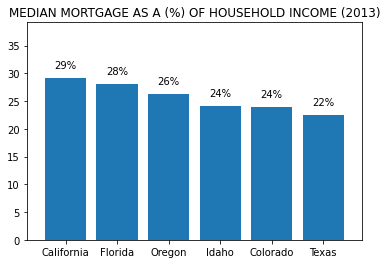

In [38]:
# Plots

x_axis = sorted_df["Name"]
y_axis = sorted_df["Housing units with a mortgage 2013"]
plt.title("MEDIAN MORTGAGE AS A (%) OF HOUSEHOLD INCOME (2013)")
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis) + 10)

plt.bar(x_axis,y_axis)

for x,y in zip(x_axis,y_axis):

    label = "{:.0f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()
